<a href="https://colab.research.google.com/github/Dong2Yo/DATA3960_1232/blob/main/Lectures/Wk3_Customer_Loyalty_Bank_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Data was obtained from Kaggle database URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Dong2Yo/Dataset/main/Customer_Loyalty_Bank_descriptive.csv')

# Customer Loyalty Analysis

The dataset provides a collection of details about bank customers and whether or not they continued with the bank's services. The following features are available in the dataset:

## Features Description

- **RowNumber**: Represents the record number and doesn't have an impact on the output.
- **CustomerId**: Contains random values, doesn't have an effect on customer churn.
- **Surname**: The surname of the customers. Not relevant to the customer churn.
- **CreditScore**: A higher credit score might make a customer less likely to leave.
- **Geography**: Customer's location can influence their decision to exit.
- **Gender**: Worth exploring if gender has any influence on the decision to leave the bank.
- **Age**: Older customers are generally less likely to leave than younger ones.
- **Tenure**: Number of years the customer has stayed with the bank. Longer tenures indicate loyalty.
- **Balance**: Customers with higher balances are less likely to leave the bank.
- **NumOfProducts**: Number of bank products the customer is using.
- **HasCrCard**: Indicates if a customer possesses a credit card.
- **IsActiveMember**: Active customers are less likely to churn.
- **EstimatedSalary**: Customers with lower estimated salaries might be more likely to churn.
- **Complain**: Shows if a customer has made any complaints.
- **Satisfaction Score**: A score provided by the customer based on the resolution of their complaint.
- **Card Type**: Type of card held by the customer.
- **Points Earned**: Points earned by the customer from using their credit card.
- **Exited**: Indicates if a customer has exited the bank.


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
print('Number of Duplicated values:', data.duplicated().sum())

Number of Duplicated values: 0


In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1 )
print('The Shape of the data:', data.shape)
data.head()

The Shape of the data: (10000, 15)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Data Visualization

##### Active members

In [ ]:
# Count the occurrences of each value
active_count = data['IsActiveMember'].value_counts()
active_count

1    5151
0    4849
Name: IsActiveMember, dtype: int64

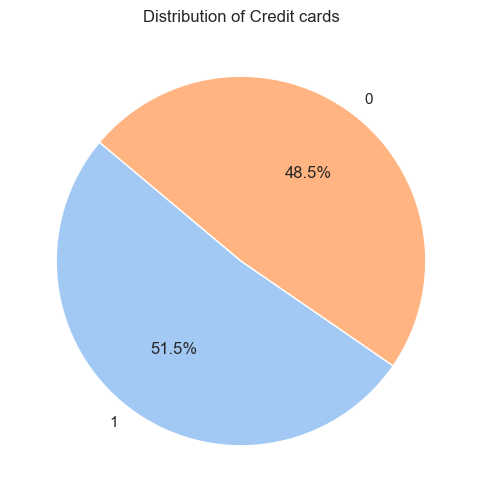

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(active_count, labels=active_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Credit cards')
plt.show()

##### Credt card

In [ ]:
# Count the occurrences of each value
credit_count = data['HasCrCard'].value_counts()
credit_count

1    7055
0    2945
Name: HasCrCard, dtype: int64

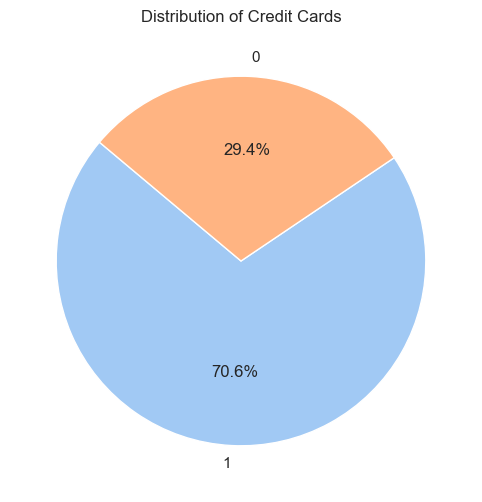

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(credit_count, labels=credit_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Credit Cards')
plt.show()

In [ ]:
active_count = data['IsActiveMember'].sum()
no_active_count = len(data) - active_count
has_cr_card = data["HasCrCard"].sum()
no_cr_card = len(data) - has_cr_card

print(f"Out of all the customers, {active_count} are active members while {no_active_count} are not. Additionally, {has_cr_card} customers possess a credit card, whereas {no_cr_card} do not.")

Out of all the customers, 5151 are active members while 4849 are not. Additionally, 7055 customers possess a credit card, whereas 2945 do not.


##### Complain

In [ ]:
# Count the occurrences of each value
complain_count = data['Complain'].value_counts()
complain_count

0    7956
1    2044
Name: Complain, dtype: int64

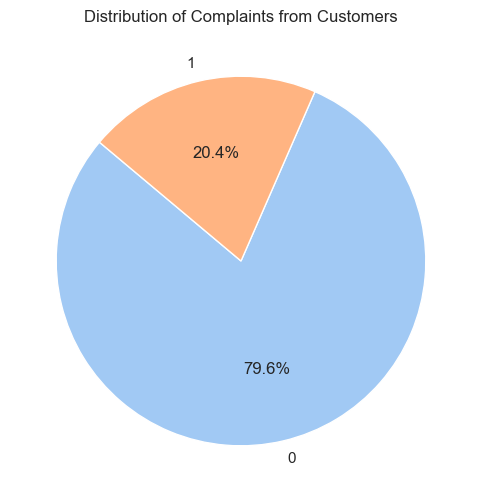

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(complain_count, labels=complain_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Complaints from Customers')
plt.show()

##### Exited: Customers that left the bank

In [ ]:
# Count the occurrences of each value
exited_counts = data['Exited'].value_counts()
exited_counts

0    7962
1    2038
Name: Exited, dtype: int64

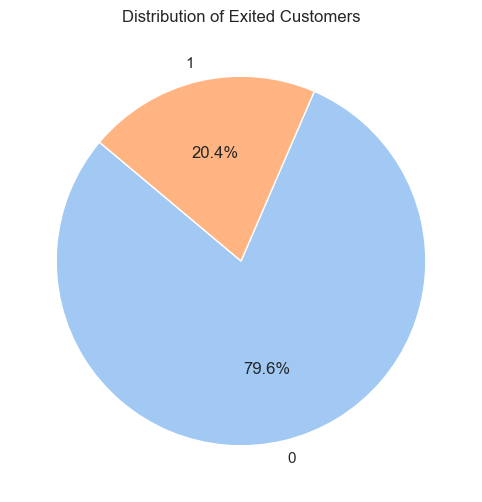

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(exited_counts, labels=exited_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Exited Customers')
plt.show()

In [ ]:
complain_count = data['Complain'].sum()
no_complain_count = len(data) - complain_count
exited_count = data["Exited"].sum()
no_exited_count = len(data) - exited_count

print(f"Out of all the customers, {complain_count} have registered complaints, whereas {no_complain_count} have not. Additionally, {exited_count} customers chose to exit, while {no_exited_count} opted to stay.")

Out of all the customers, 2044 have registered complaints, whereas 7956 have not. Additionally, 2038 customers chose to exit, while 7962 opted to stay.


##### Gender

In [ ]:
gender_counts = data['Gender'].value_counts()
gender_counts

Male      5457
Female    4543
Name: Gender, dtype: int64

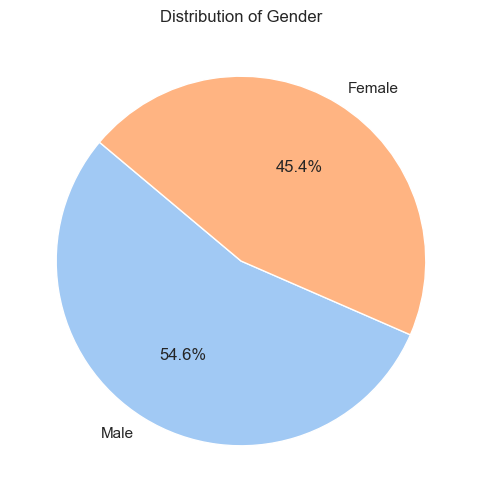

In [ ]:
# Pie chart creation using matplotlib
plt.figure(figsize=(10,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Gender')
plt.show()

##### Geography

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot: xlabel='Geography', ylabel='count'>

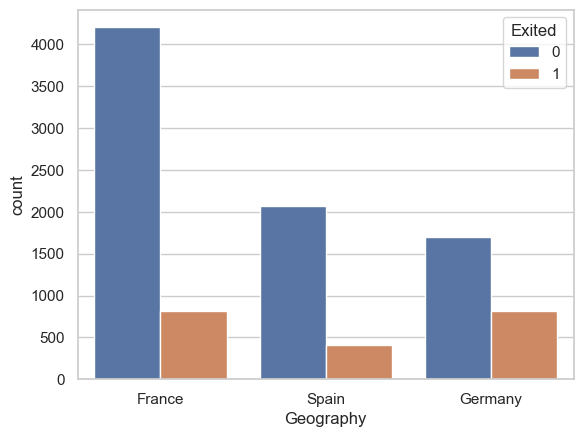

In [ ]:
sns.countplot(x=data['Geography'], hue=data['Exited'])

<AxesSubplot: xlabel='Point Earned', ylabel='Proportion'>

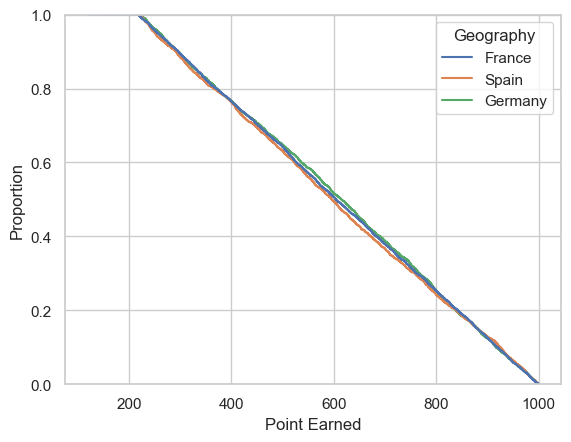

In [ ]:
sns.ecdfplot(data=data, x="Point Earned", hue="Geography", complementary=True)

<AxesSubplot: xlabel='Geography', ylabel='Balance'>

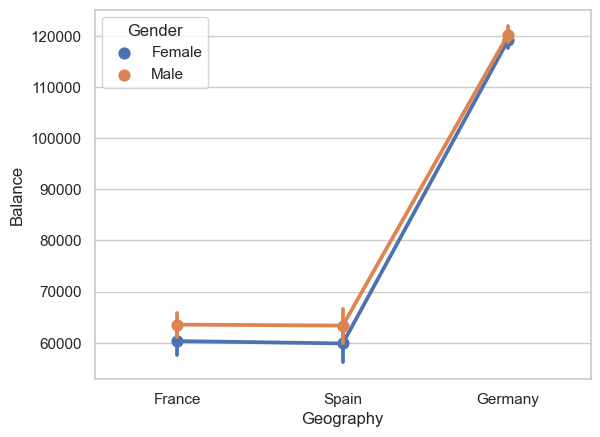

In [ ]:
sns.pointplot(data=data, x="Geography", y="Balance", hue="Gender")

##### Customer Card type

In [ ]:
data['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

<AxesSubplot: xlabel='Card Type', ylabel='count'>

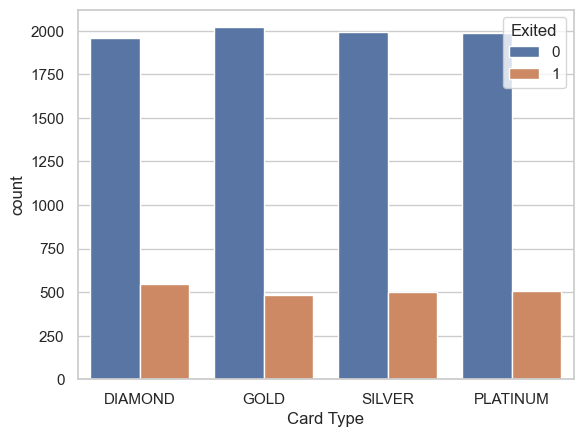

In [ ]:
sns.countplot(x=data['Card Type'], hue=data['Exited'])

<AxesSubplot: xlabel='Balance', ylabel='Card Type'>

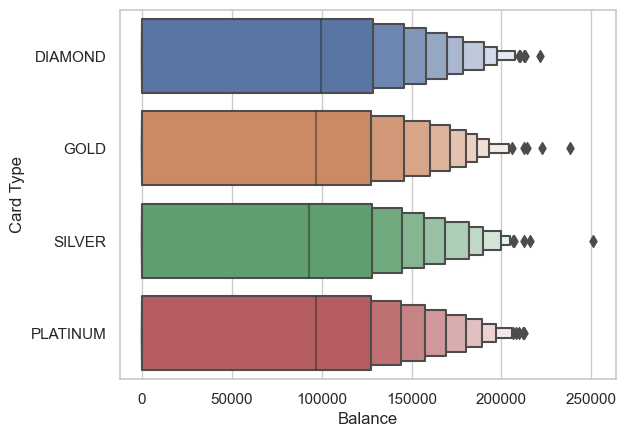

In [ ]:
sns.boxenplot(data=data, x="Balance", y="Card Type", scale="linear")

##### Products

In [ ]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<AxesSubplot: xlabel='NumOfProducts', ylabel='count'>

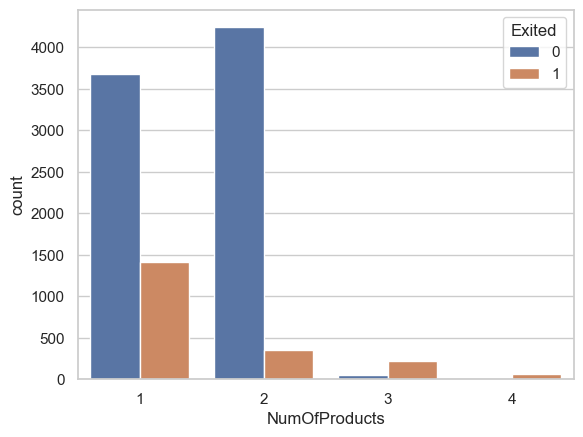

In [ ]:
sns.countplot(x=data['NumOfProducts'], hue=data['Exited'])

##### Tenure: Number of years

In [ ]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<AxesSubplot: xlabel='Tenure', ylabel='count'>

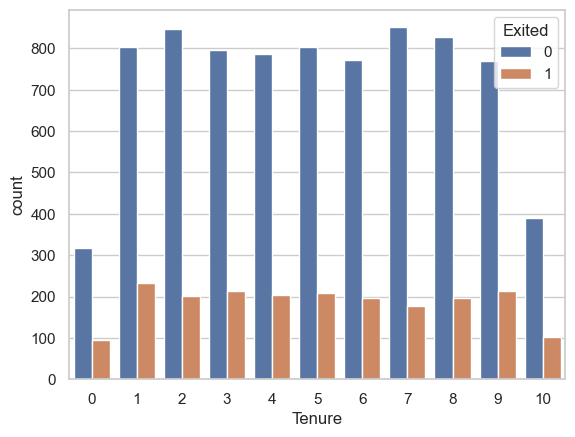

In [ ]:
sns.countplot(x=data['Tenure'], hue=data['Exited'])

##### Customer Satisfaction Score

In [ ]:
data['Satisfaction Score'].value_counts()

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: int64

<AxesSubplot: xlabel='Satisfaction Score', ylabel='count'>

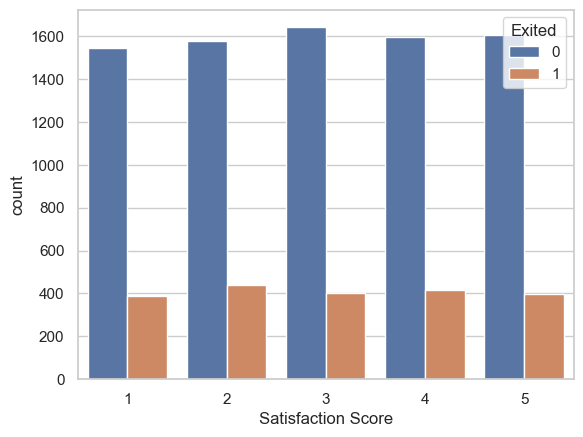

In [ ]:
sns.countplot(data=data, x="Satisfaction Score", hue="Exited")

### Frequency Distribution

##### Age

In [ ]:
data["Age"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
Age,18.0,38.9218,37.0,92.0,10.487806,1.01132


<AxesSubplot: xlabel='Age', ylabel='Density'>

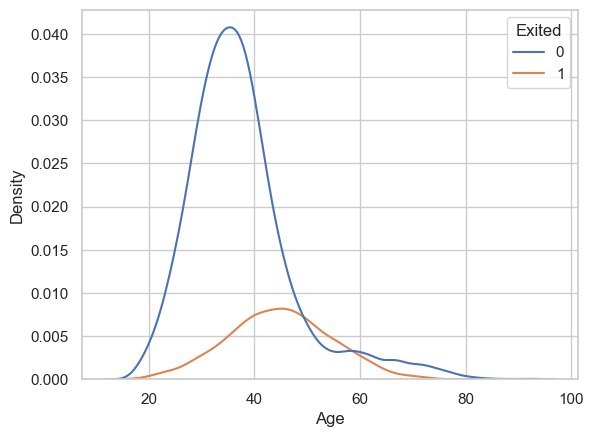

In [ ]:
sns.kdeplot(data=data, x="Age", hue="Exited")

##### Customer Estimated Salary

In [ ]:
data["EstimatedSalary"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
EstimatedSalary,11.58,100090.239881,100193.915,199992.48,57510.492818,0.002085


<AxesSubplot: xlabel='EstimatedSalary', ylabel='Density'>

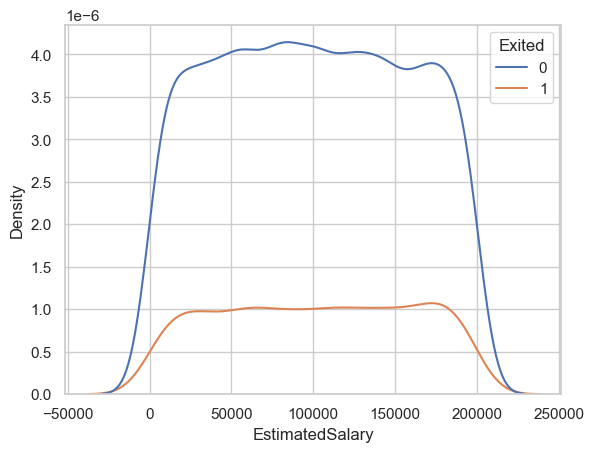

In [ ]:
sns.kdeplot(data=data, x="EstimatedSalary", hue="Exited")

##### Balance

In [ ]:
data["Balance"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
Balance,0.0,76485.889288,97198.54,250898.09,62397.405202,-0.141109


<AxesSubplot: xlabel='Balance', ylabel='Density'>

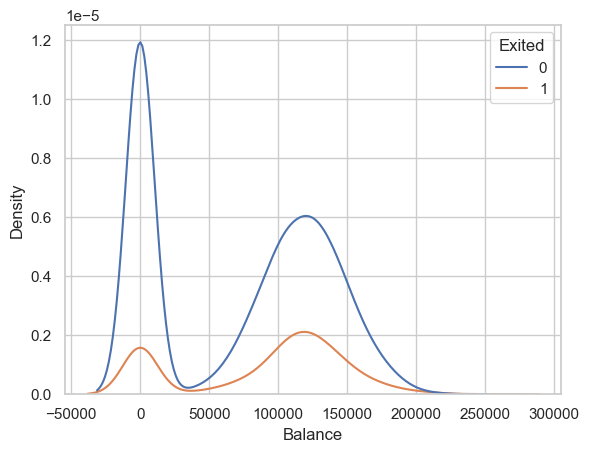

In [ ]:
sns.kdeplot(data=data, x="Balance", hue="Exited")

##### CreditScore

In [ ]:
data["CreditScore"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
CreditScore,350.0,650.5288,652.0,850.0,96.653299,-0.071607


<AxesSubplot: xlabel='CreditScore', ylabel='Density'>

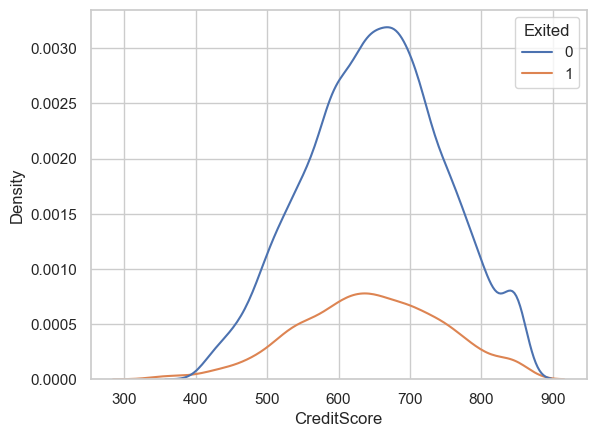

In [ ]:
sns.kdeplot(data=data, x="CreditScore", hue="Exited")

##### Point Earned

In [ ]:
data["Point Earned"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
Point Earned,119.0,606.5151,605.0,1000.0,225.924839,0.008344


<AxesSubplot: xlabel='Point Earned', ylabel='Density'>

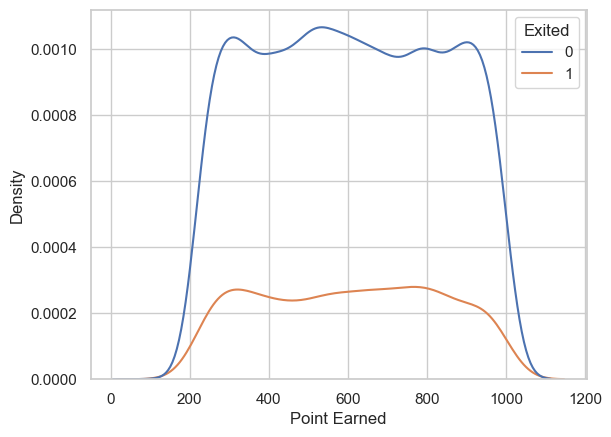

In [ ]:
sns.kdeplot(data=data, x="Point Earned", hue="Exited")

### Scatterplot

**Age feature** seems to play an important role in customer staying or exiting the bank.

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Age'>

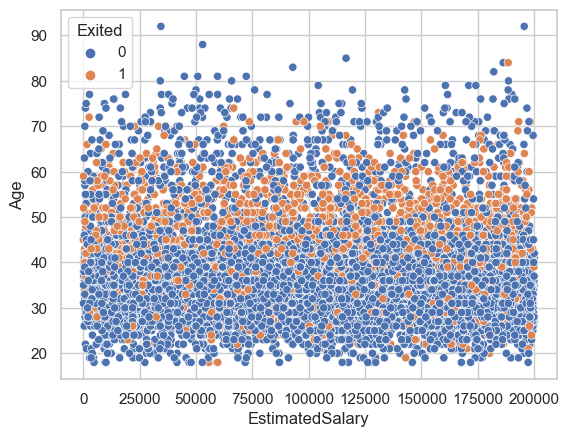

In [ ]:
sns.scatterplot(data=data, x="EstimatedSalary", y="Age", hue="Exited")

<AxesSubplot: xlabel='CreditScore', ylabel='Age'>

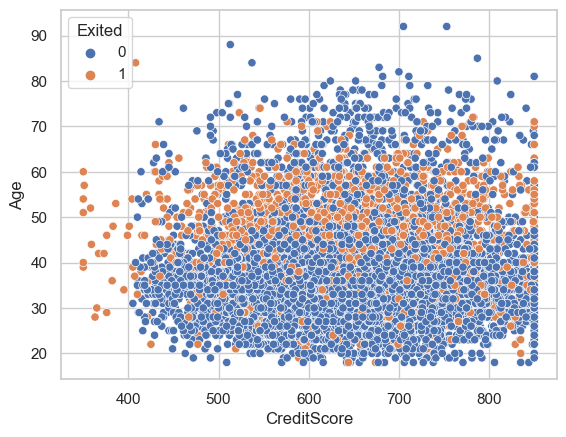

In [ ]:
sns.scatterplot(data=data, x="CreditScore", y="Age", hue="Exited")

## Correlation Martix

C:\Users\DONGY\AppData\Local\Temp\ipykernel_19916\1877307313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


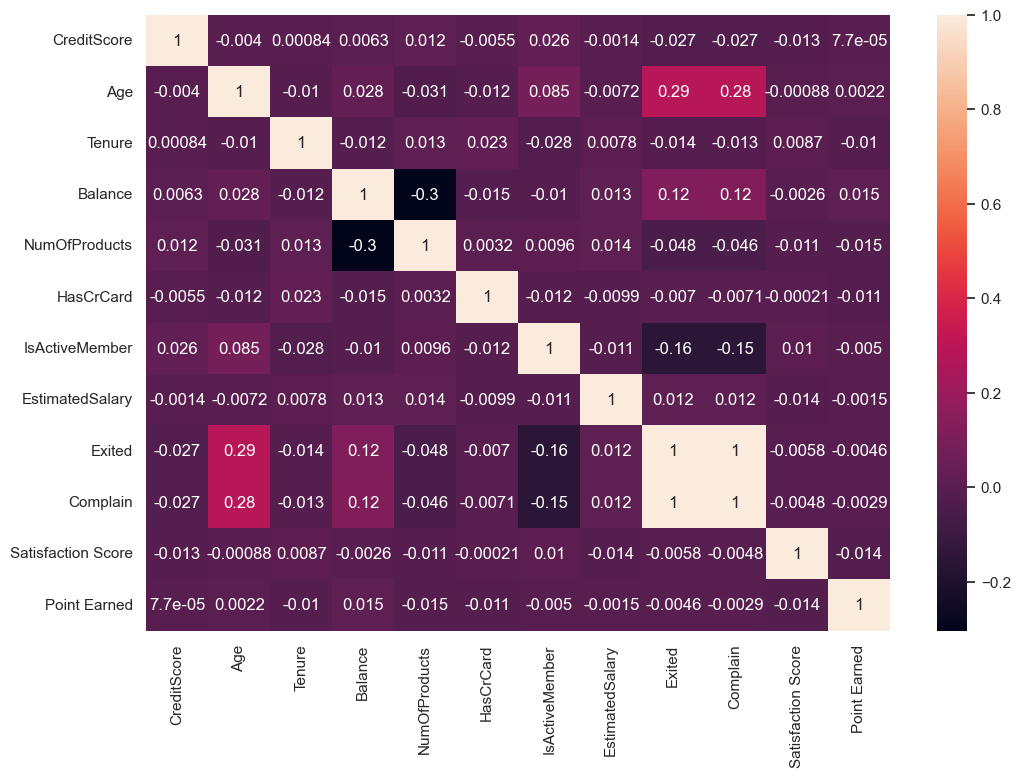

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust (12, 8) as per your preference
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data Preprocessing

### Split into Dependant and Independant variables

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### Convert Geography, Gender, Card-Type Labels

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# List of columns to be one-hot encoded
columns_to_encode = ['Geography', 'Gender', 'Card Type']

# Set up the transformer
transformer = ColumnTransformer(
    transformers=[
        ("OneHot", OneHotEncoder(), columns_to_encode)
    ], remainder='passthrough'  # Leave remaining columns untouched
)

# Apply the transformation to data
data_encoded = transformer.fit_transform(data)

# Convert back to dataframe if necessary and concatenate with original data (minus the encoded columns)
data_encoded_df = pd.DataFrame(data_encoded)
data = pd.concat([data.drop(columns_to_encode, axis=1), data_encoded_df], axis=1)

In [ ]:
data.columns = data.columns.astype(str)

In [ ]:
X = data.drop('Exited', axis=1)
y = data['Exited']

#### Split into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Now apply the StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistics Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)
model = LogisticRegression(random_state = 0)
classifier_lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier_lg.predict(X_test)

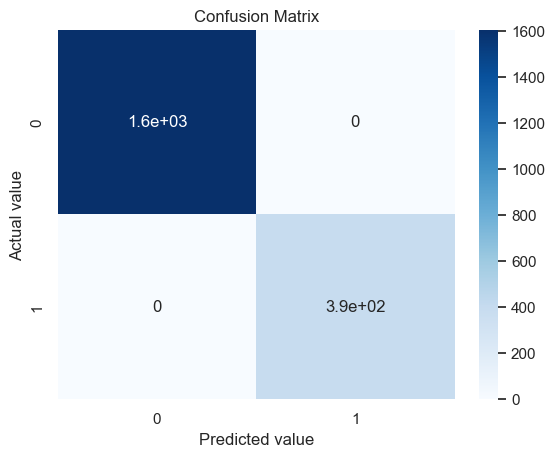

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy, precision, recall and f1_score
accuracy_lg = accuracy_score(y_test, y_pred)*100
precision_lg = precision_score(y_test, y_pred)*100
score_lg = f1_score(y_test, y_pred)*100
recall_lg = recall_score(y_test, y_pred)*100

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Set labels and title
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

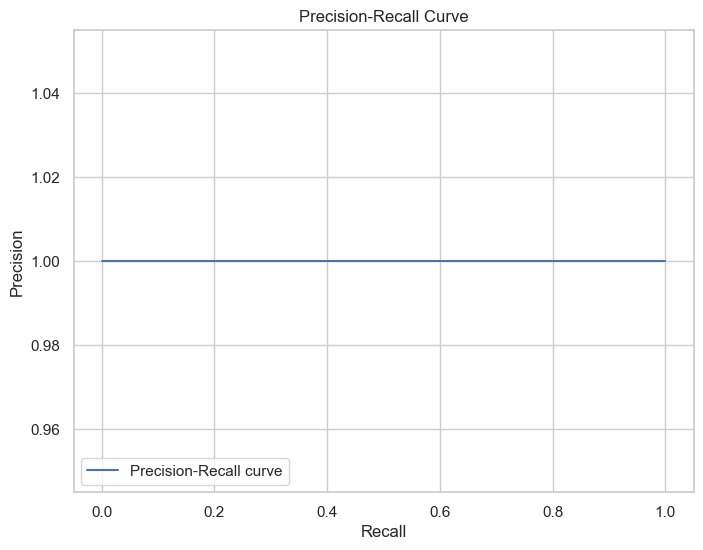

In [ ]:
from sklearn.metrics import precision_recall_curve

# Suppose you have your model (lg) and your data (X_test, y_test)
y_scores = classifier_lg.predict_proba(X_test)[:, 1]  # get the probability estimates of the positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.99 %
Standard Deviation: 0.04 %


#### The model (Logistics Regression) has an accuracy of 100% and with the K-Fold Cross Validation.